## Titanic Competition - Kaggle

The propouse of this notebook is study the titanic dataset and create a Machine Learning model to predict survivors on titanic.

In [130]:
# Librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [131]:
# Data Load
data = pd.read_csv("train.csv")
data.shape

(891, 12)

In [132]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Exploration

In [133]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [135]:
# Null count per column
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Survived'>

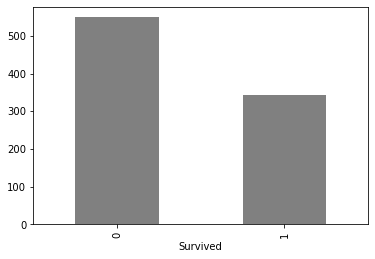

In [136]:
# Explore the target: Survived
survived_group = data.groupby(["Survived"]).size()
survived_group.plot.bar(color='gray')

<AxesSubplot:xlabel='Age', ylabel='Count'>

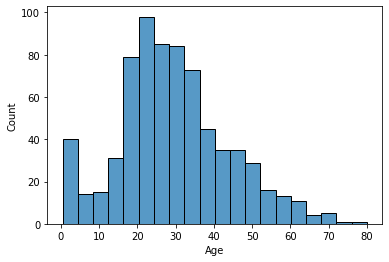

In [137]:
# Explore Age
sns.histplot(x="Age", data=data)

<AxesSubplot:xlabel='Sex'>

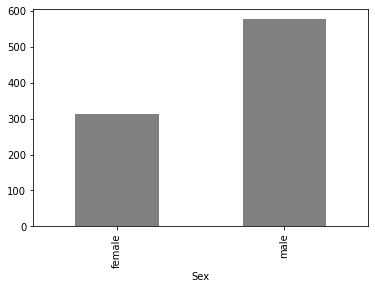

In [138]:
# The sex distribuition
sex_group = data.groupby(["Sex"]).size()
sex_group.plot.bar(color='gray')

<AxesSubplot:xlabel='SibSp'>

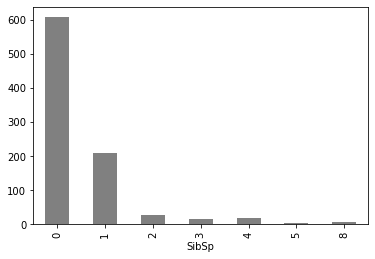

In [139]:
# Number of siblings
sib_group = data.groupby(["SibSp"]).size()
sib_group.plot.bar(color="gray")

<AxesSubplot:xlabel='Parch'>

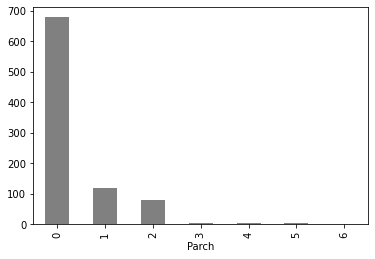

In [140]:
# Number of family relations in this way
parch_group = data.groupby(["Parch"]).size()
parch_group.plot.bar(color="gray")

<AxesSubplot:xlabel='Embarked'>

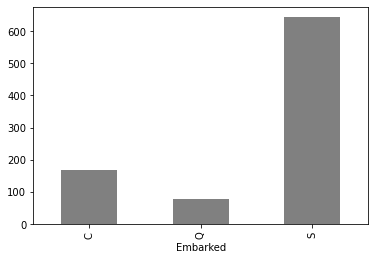

In [141]:
embarked_group = data.groupby(["Embarked"]).size()
embarked_group.plot.bar(color="gray")

<AxesSubplot:xlabel='Fare'>

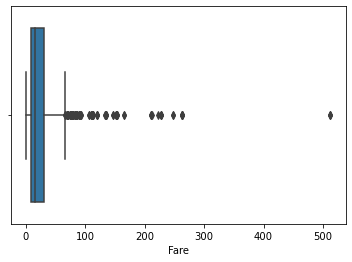

In [142]:
# Passenger fare
sns.boxplot(x="Fare", data=data)

### Data Processing

In [143]:
# Age
age_median = np.nanmedian(data["Age"])
data["Age"].fillna(age_median, inplace=True)
data["Age"].isnull().sum()

0

In [144]:
# Replace Age for Age Categorie
age = []
for i in data.index:
    if data["Age"].loc[i] > 0 and data["Age"].loc[i] <= 10:
        age.append("Kid")
    elif data["Age"].loc[i] > 10 and data["Age"].loc[i] < 21:
        age.append("Teen")
    elif data["Age"].loc[i] >= 21 and data["Age"].loc[i] < 60:
        age.append("Aduld")
    elif data["Age"].loc[i] >= 60:
        age.append("Senior")

In [145]:
data.Age = age

In [146]:
# Cabin
data = data.drop(columns=["Cabin"])

In [147]:
# Embarked
data["Embarked"].fillna("S", inplace=True)
data["Embarked"].isnull().sum()

0

In [148]:
# Null count
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Prepare dataset for machine learning

In [149]:
# Separate Survived from database and creates copy
target = data["Survived"]
data.drop("Survived", axis=1, inplace=True)
data_main = data.copy()
data_w_family = data.copy()
data_w_embarked = data.copy()

In [150]:
# Drop columns considered useless
data_main.drop(["Name", "PassengerId", "Ticket", "Embarked", "SibSp", "Parch"], axis=1, inplace=True)
data_w_family.drop(["Name", "PassengerId", "Ticket", "Embarked"], axis=1, inplace=True)
data_w_embarked.drop(["Name", "PassengerId", "Ticket", "SibSp", "Parch"], axis=1, inplace=True)

In [151]:
# Get Dummies
data_main = pd.get_dummies(data_main)
data_w_family = pd.get_dummies(data_w_family)
data_w_embarked = pd.get_dummies(data_w_embarked)

In [152]:
# Split train and test
x_main_train, x_main_test, y_main_train, y_main_test = train_test_split(data_main, target, test_size=0.2)
x_family_train, x_family_test, y_family_train, y_family_test = train_test_split(data_w_family, target, test_size=0.2)
x_embarked_train, x_embarked_test, y_embarked_train, y_embarked_test = train_test_split(data_w_embarked, target, test_size=0.2)

### Machine Learning
In this session i will use two algorithms: Logistic Regression and Decision Tree, for classification.

In [153]:
# Create the models - Logistic Regression
main_logistic = LogisticRegression(solver='liblinear')
family_logistic = LogisticRegression(solver='liblinear')
embarked_logistic = LogisticRegression(solver='liblinear')

In [154]:
# Create the models - Decision Tree
main_tree = DecisionTreeClassifier(max_depth=3)
family_tree = DecisionTreeClassifier(max_depth=3)
embarked_tree = DecisionTreeClassifier(max_depth=3)

In [155]:
# Train decision tree models
main_tree.fit(x_main_train, y_main_train)
family_tree.fit(x_family_train, y_family_train)
embarked_tree.fit(x_embarked_train, y_embarked_train)

DecisionTreeClassifier(max_depth=3)

In [156]:
# Predict with decision tree models
main_predict = main_tree.predict(x_main_test)
family_predict = family_tree.predict(x_family_test)
embarked_predict = embarked_tree.predict(x_embarked_test)

### Evaluate the model
Evaluate the models with their accuracy and cross validation score.

In [157]:
# Logistic model
main_acc = cross_val_score(main_logistic, x_main_train, y_main_train, cv=5)
family_acc = cross_val_score(family_logistic, x_family_train, y_family_train, cv=5)
embarked_acc = cross_val_score(embarked_logistic, x_embarked_train, y_embarked_train, cv=5)

In [158]:
print("Main: ", np.mean(main_acc)*100)
print("Family: ", np.mean(family_acc)*100)
print("Embarked: ", np.mean(embarked_acc)*100)

Main:  78.64966019895597
Family:  80.762336255294
Embarked:  78.7944449916281


In [159]:
# Decision Tree model
main_decision = cross_val_score(main_tree, x_main_train, y_main_train, cv=5)
family_decision = cross_val_score(family_tree, x_family_train, y_family_train, cv=5)
embarked_decision = cross_val_score(embarked_tree, x_embarked_train, y_embarked_train, cv=5)

In [160]:
print("Main: ", np.mean(main_decision)*100)
print("Family: ", np.mean(family_decision)*100)
print("Embarked: ", np.mean(embarked_decision)*100)

Main:  81.74234216487737
Family:  81.45769723234511
Embarked:  82.02107751403526


In [161]:
# Accuracy Score
main_accuracy = accuracy_score(y_main_test, main_predict) * 100
family_accuracy = accuracy_score(y_family_test, family_predict) * 100
embarked_accuracy = accuracy_score(y_embarked_test, embarked_predict) * 100

In [162]:
print("Main: ", main_accuracy)
print("Family: ", family_accuracy)
print("Embarked: ", embarked_accuracy)

Main:  79.88826815642457
Family:  78.2122905027933
Embarked:  80.44692737430168


### Conclusion

<p>
    Decision Tree achieved better accuracy and Cross Validation Score in relation to Logistic Regression algorithm.
</p>    
<p> 
   The three types of models are precisely similar on average.
</p>